<a href="https://colab.research.google.com/github/Shubham-naik-ai/NYC-taxi-trip-time-prediction/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

#First of all, importation of all the necessary libraries

In [93]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import Series
from datetime import datetime

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/AlmaBetter/SupervisedML-Regression/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Data

In [94]:
#Loading the Dataset
train_df = pd.read_csv(working_dir_path + 'NYCTaxiData.csv')

In [95]:
#Checking dimensions
train_df.shape

(1458644, 11)

#Exploring the Dataset

In [96]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [97]:
train_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


##This function can provide statistics for numerical features only

In [99]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [100]:
train_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [101]:
train_df[train_df['passenger_count']==0].count()


id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [102]:
# Let us check for unique values of all columns.

train_df.nunique()


id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

 

*   We see that id has 1458644 unique values which are equal to the number of rows in our dataset.
*   There are 2 unique vendor ids.

*  There are 10 unique passenger counts.
*   There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.












In [103]:
train_df.duplicated().sum()

0

In [104]:
# Let us see if there are any null values in our dataset.

train_df.isnull().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [105]:
#Looking for NaN

train_df.isna().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in this dataset which saves us a step of imputing.

In [106]:
train_df['vendor_id'].value_counts().reset_index()


,index,vendor_id
0,2,780302
1,1,678342


In [107]:
train_df['store_and_fwd_flag'].value_counts().reset_index()


,index,store_and_fwd_flag
0,N,1450599
1,Y,8045


#Feature Creation

 pickup_datetime and dropoff_datetime were both of type object.
 
 We can convert it to datetime using the following code.

In [108]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])

Now if you will run the dtypes function again, you will be able to see the type as datetime64[ns].

Now, let us extract and create new features from this datetime features we just created.

In [109]:
train_df['pickup_day']=train_df['pickup_datetime'].dt.day_name()
train_df['dropoff_day']=train_df['dropoff_datetime'].dt.day_name()

In [110]:
train_df['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [111]:
train_df['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

In [112]:
## Create features relating to time

train_df['pickup_day']=train_df['pickup_datetime'].dt.day_name()
train_df['dropoff_day']=train_df['dropoff_datetime'].dt.day_name()

train_df['pickup_day_no']=train_df['pickup_datetime'].dt.weekday
train_df['dropoff_day_no']=train_df['dropoff_datetime'].dt.weekday

train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour
train_df['dropoff_hour']=train_df['dropoff_datetime'].dt.hour

train_df['pickup_month']=train_df['pickup_datetime'].dt.month
train_df['dropoff_month']=train_df['dropoff_datetime'].dt.month


We have created the following features:

pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.

pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

pickup_month and dropoff_month with month number with January=1 and December=12.

# Create features relating to time

Next, I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [113]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [114]:
train_df['pickup_timeofday']=train_df['pickup_hour'].apply(time_of_day)
train_df['dropoff_timeofday']=train_df['dropoff_hour'].apply(time_of_day)

Importing the library which lets us calculate distance from geographical coordinates.

In [115]:
from geopy.distance import great_circle

In [116]:
# Defining a function to take coordinates as inputs and return us distance.
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [117]:
# Applying the function to our dataset and creating the feature ‘distance’.

train_df['distance'] = train_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


### Looking for and handling Outliers

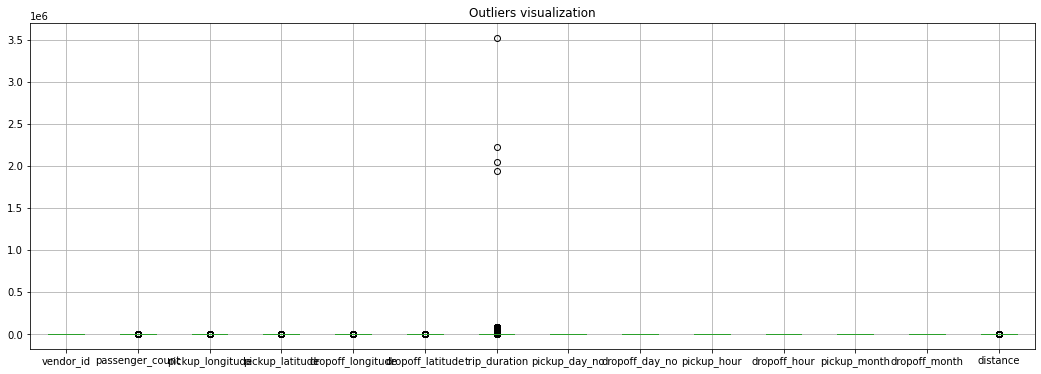

In [118]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
train_df.boxplot();

We can clearly see an outlier in trip_duration.

In [119]:
## Remove outliers
train_df=train_df[train_df.trip_duration!=train_df.trip_duration.max()]

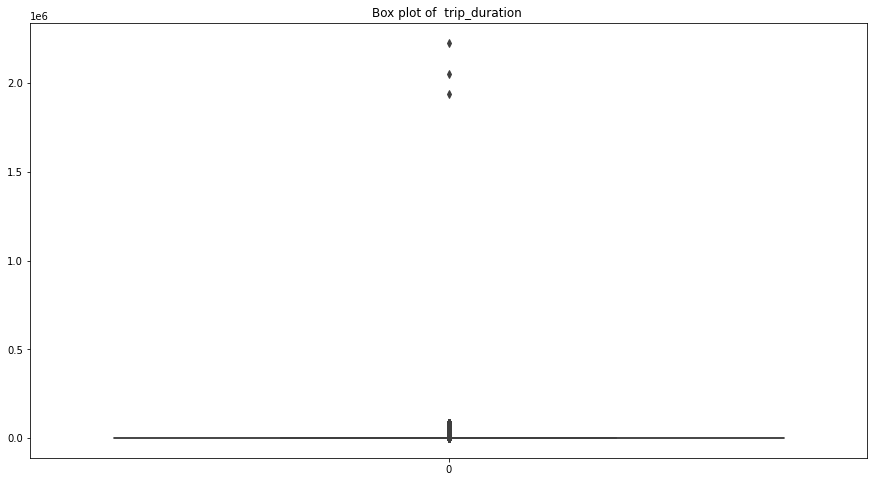

In [120]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=train_df['trip_duration'], orient="v")

In [121]:
percentile_q1_trip_duration = np.percentile(train_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(train_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(train_df['trip_duration'],75)
print(percentile_q3_trip_duration)

397.0
662.0
1075.0


In [122]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

In [123]:
print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -620.0
Upper limit for outlier  : 2092.0


In [124]:
train_df=train_df[train_df['trip_duration']>0]
train_df=train_df[train_df['trip_duration']<upper_limit_outlier_trip_duration]

In [125]:
train_df.shape

(1384320, 22)

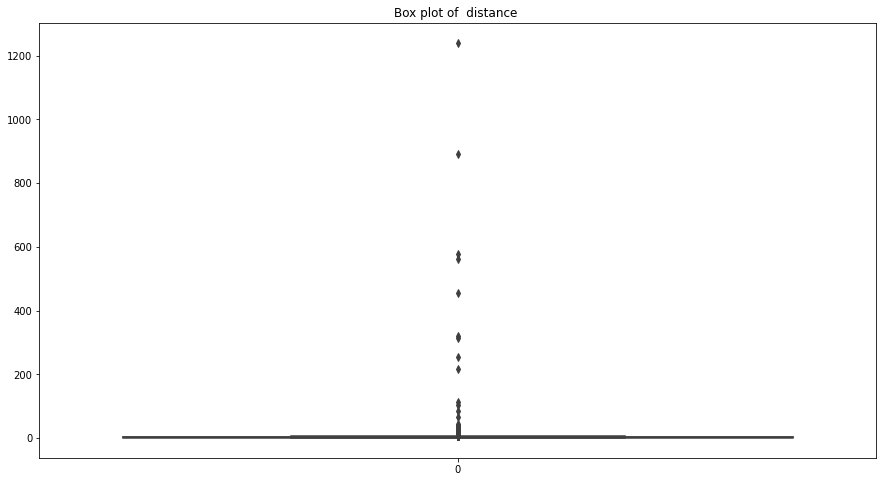

In [126]:
#Visualize distance outliers
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=train_df['distance'], orient="v")

In [127]:
percentile_q1 = np.percentile(train_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(train_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(train_df['distance'],75)
print(percentile_q3)

1.1982050274143523
1.9924508621872996
3.4855984534597932


In [128]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [129]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.2328851116538093
Upper limit for outlier  : 6.916688592527954


In [130]:
train_df=train_df[train_df['distance']>0]
train_df=train_df[train_df['distance']<upper_limit_outlier]

In [131]:
train_df.shape

(1270881, 22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


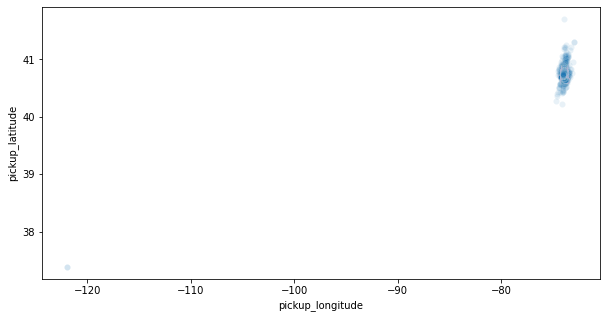

In [132]:
# Plot locations - look for outliers

plt.figure(figsize=(10,5))
sns.scatterplot(train_df.pickup_longitude,train_df.pickup_latitude,alpha = 0.1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


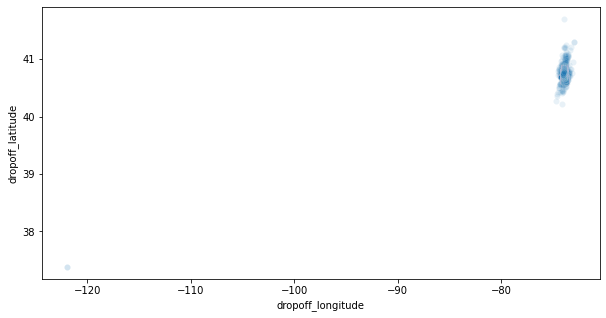

In [133]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.dropoff_longitude,train_df.dropoff_latitude,alpha = 0.1)

In [134]:
# Find limits of location
max_value = 99.999
min_value = 0.001

max_pickup_lat = np.percentile(train_df.pickup_latitude, max_value)
min_pickup_lat = np.percentile(train_df.pickup_latitude, min_value)
max_pickup_long = np.percentile(train_df.pickup_longitude, max_value)
min_pickup_long = np.percentile(train_df.pickup_longitude, min_value)

max_dropoff_lat = np.percentile(train_df.dropoff_latitude, max_value)
min_dropoff_lat = np.percentile(train_df.dropoff_latitude, min_value)
max_dropoff_long = np.percentile(train_df.dropoff_longitude, max_value)
min_dropoff_long = np.percentile(train_df.dropoff_longitude, min_value)

In [135]:
# Remove extreme values
train_df = train_df[(train_df.pickup_latitude <= max_pickup_lat) & (train_df.pickup_latitude >= min_pickup_lat)]
train_df = train_df[(train_df.pickup_longitude <= max_pickup_long) & (train_df.pickup_longitude >= min_pickup_long)]

train_df = train_df[(train_df.dropoff_latitude <= max_dropoff_lat) & (train_df.dropoff_latitude >= min_dropoff_lat)]
train_df = train_df[(train_df.dropoff_longitude <= max_dropoff_long) & (train_df.dropoff_longitude >= min_dropoff_long)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


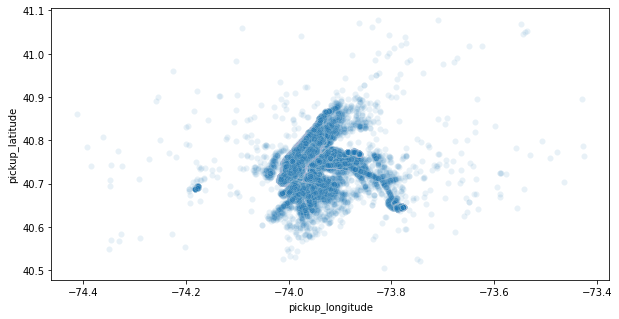

In [136]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.pickup_longitude,train_df.pickup_latitude,alpha = 0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


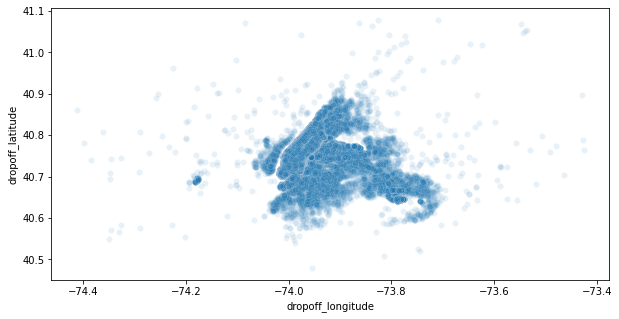

In [137]:
plt.figure(figsize=(10,5))
sns.scatterplot(train_df.dropoff_longitude,train_df.dropoff_latitude,alpha = 0.1)

# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


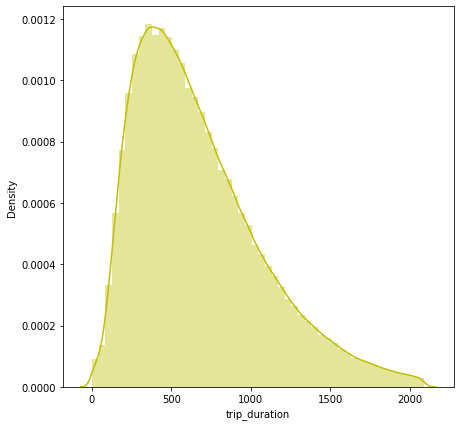

In [138]:
# Let us start by analyzing the target variable.
plt.figure(figsize=(7,7))
sns.distplot(train_df['trip_duration'],color="y")

Trip duration is left skewed so handling it by using log transformation to normalize the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


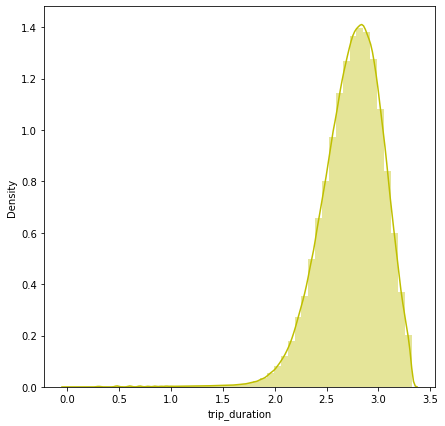

In [139]:
plt.figure(figsize=(7,7))
sns.distplot(np.log10(train_df['trip_duration']),color="y")

In [140]:
numeric_features = train_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'distance'],
      dtype='object')

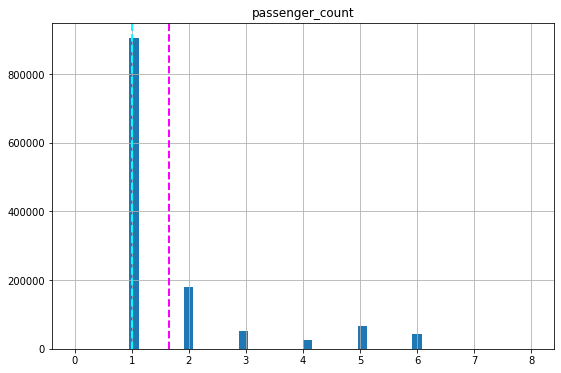

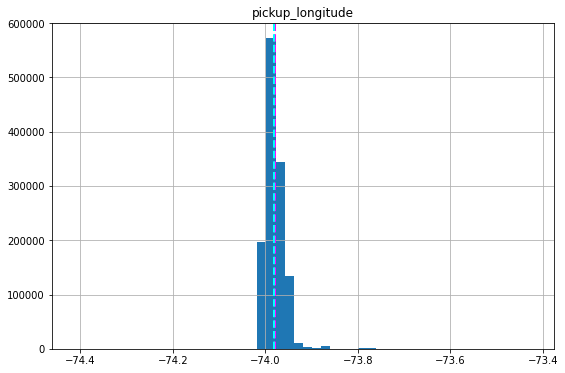

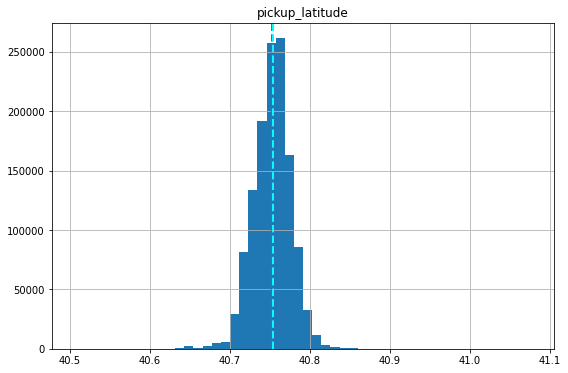

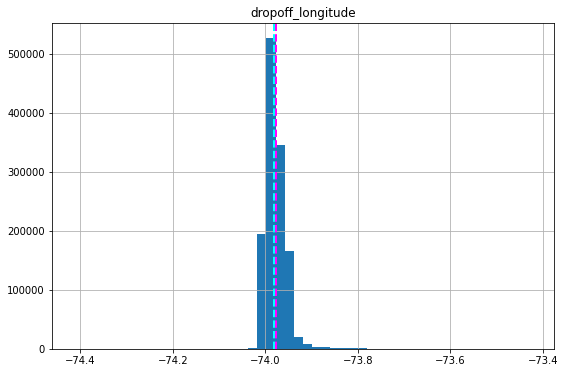

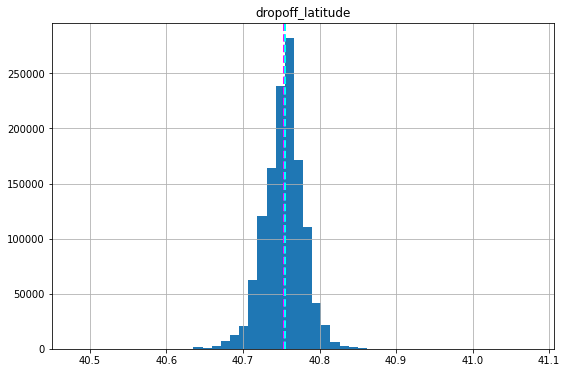

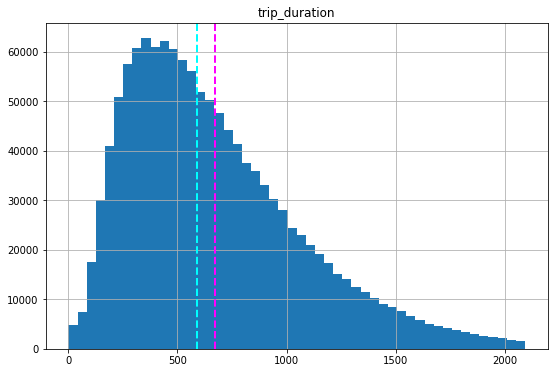

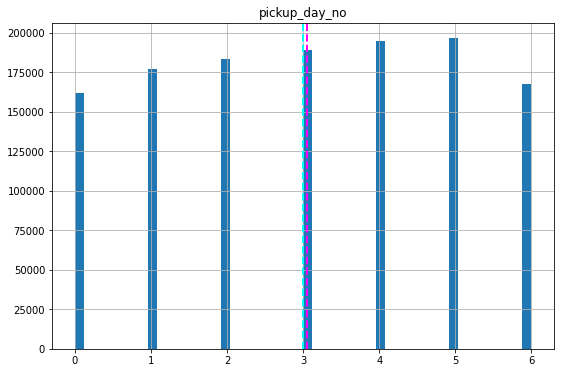

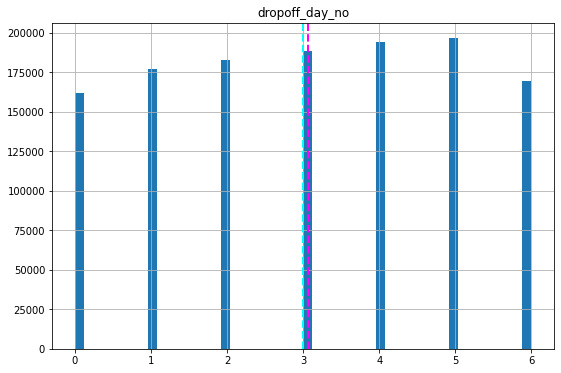

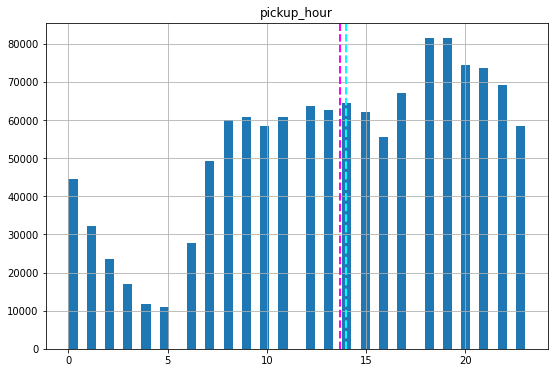

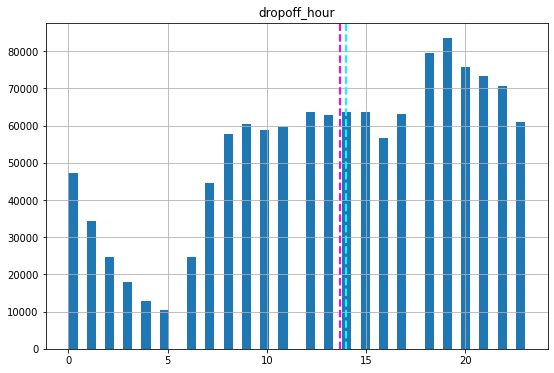

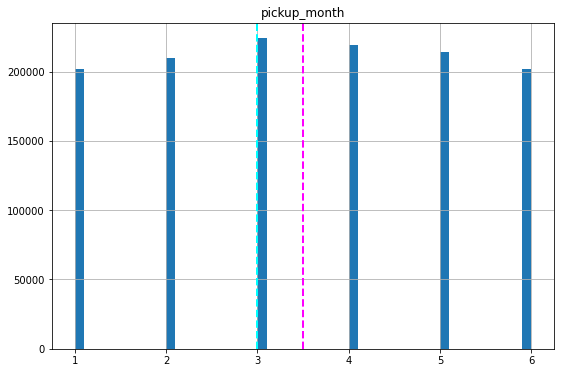

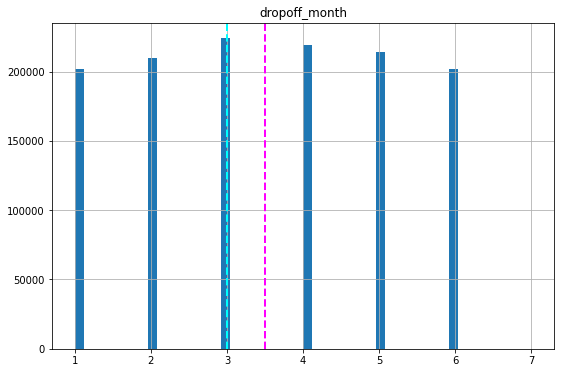

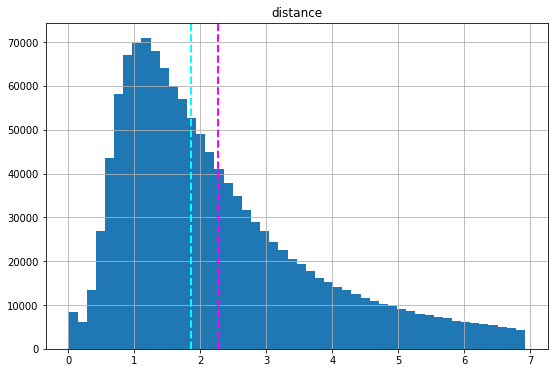

In [141]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = train_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

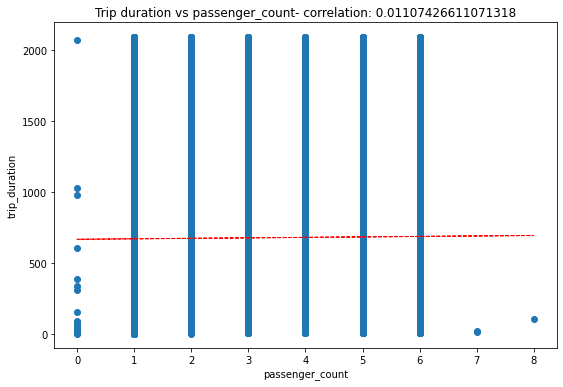

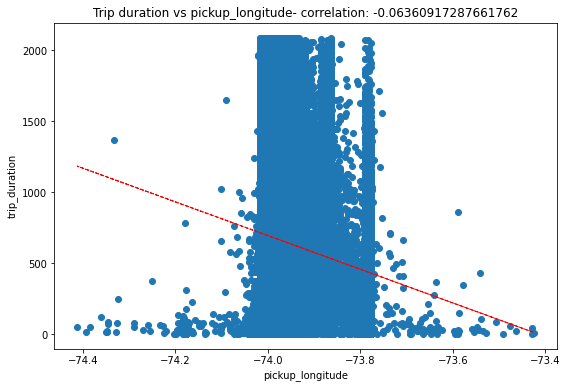

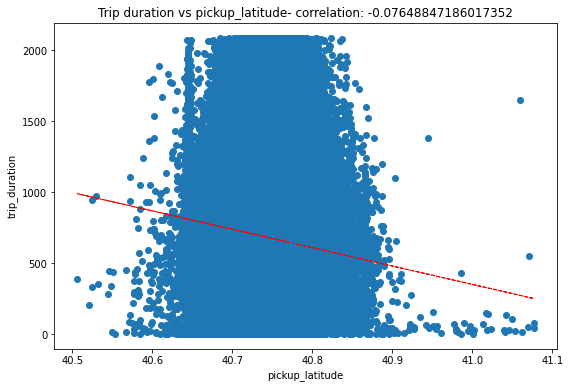

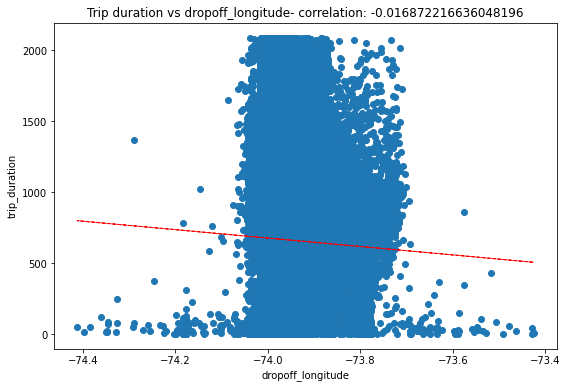

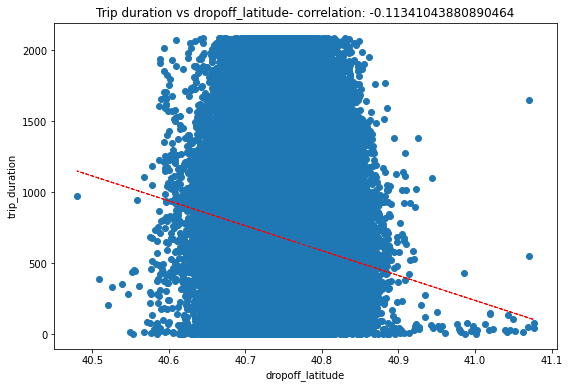

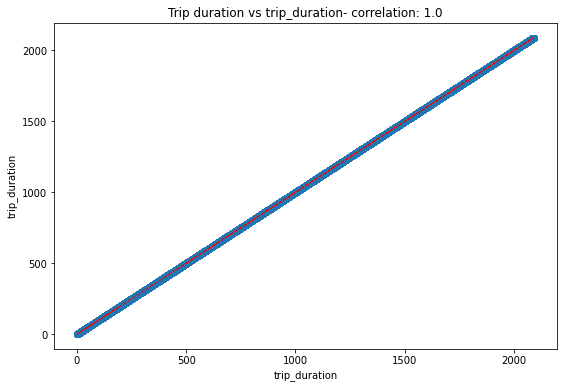

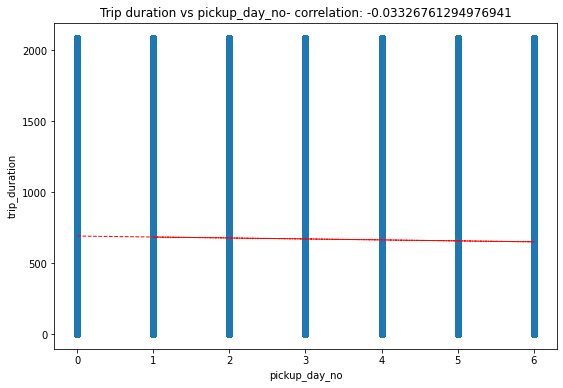

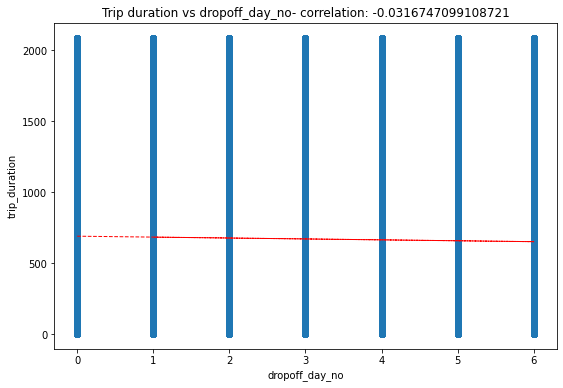

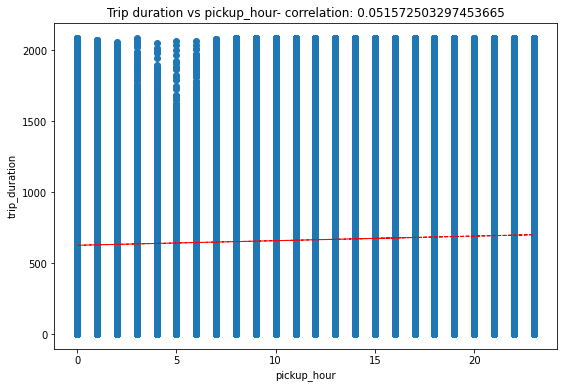

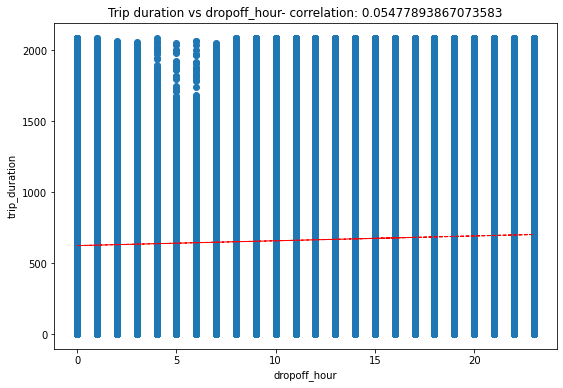

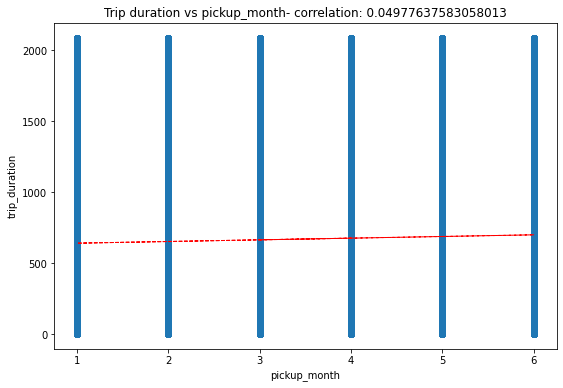

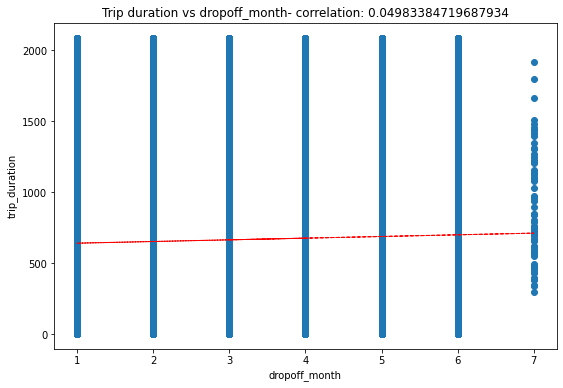

In [142]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = train_df[col]
    label = train_df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(train_df[col], train_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(train_df[col])

    plt.plot(train_df[col], y_hat, "r--", lw=1)

plt.show()

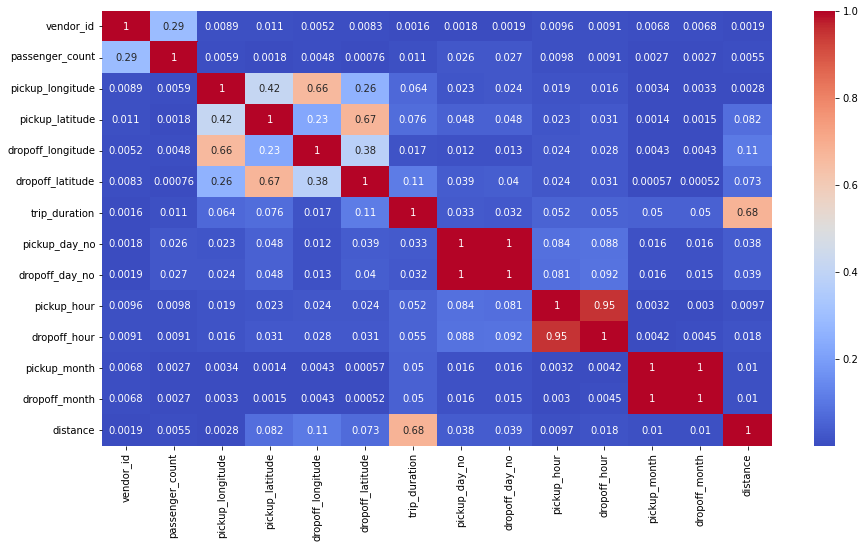

In [143]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = train_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [144]:
"""train_df = train_df[(train_df.pickup_longitude > -100)]
train_df = train_df[(train_df.pickup_latitude < 50)]"""

'train_df = train_df[(train_df.pickup_longitude > -100)]\ntrain_df = train_df[(train_df.pickup_latitude < 50)]'

#Distribution of vendor_id

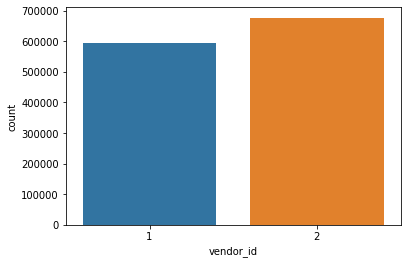

In [145]:
sns.countplot(x='vendor_id',data=train_df)

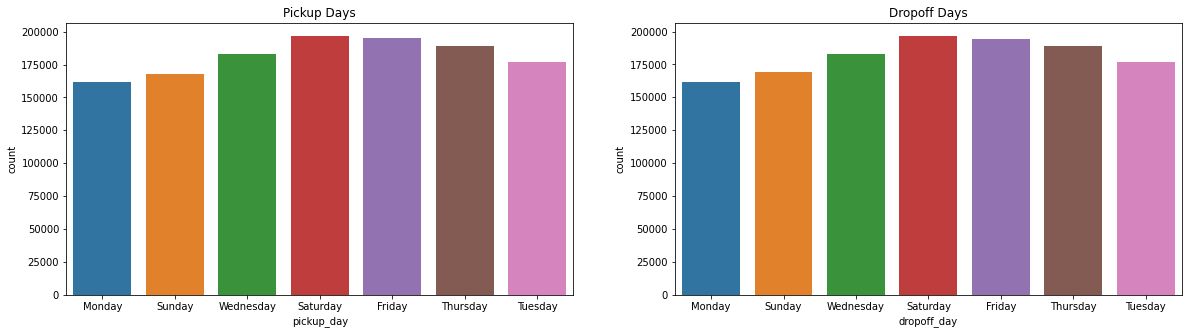

In [146]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=train_df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=train_df,ax=ax2)

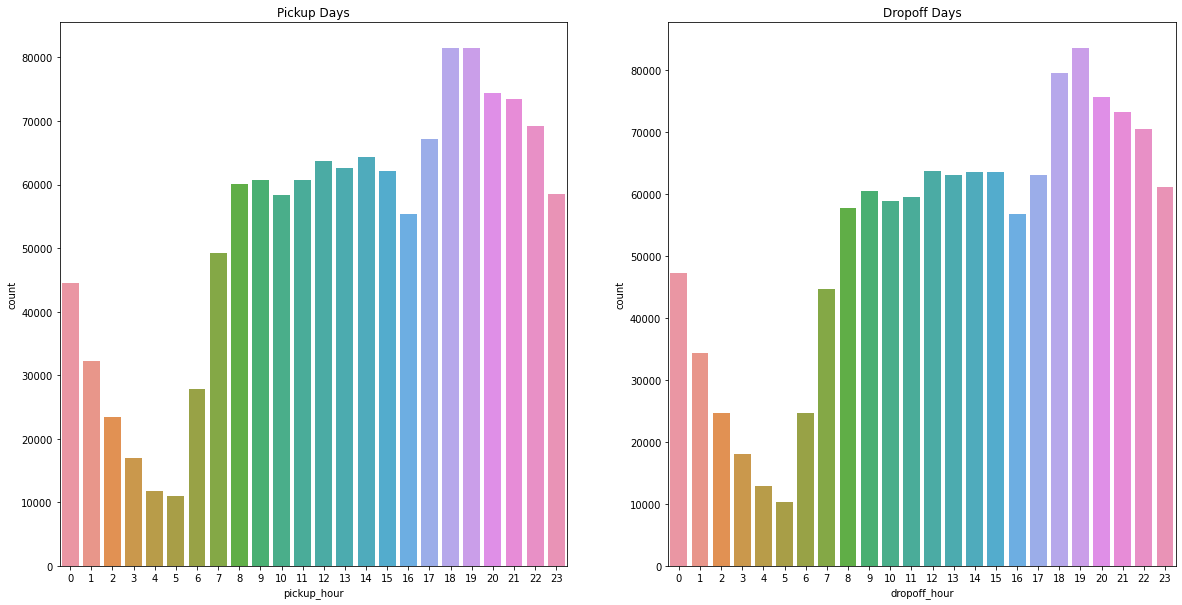

In [147]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,10))
ax3.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=train_df,ax=ax3)
ax4.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=train_df,ax=ax4)

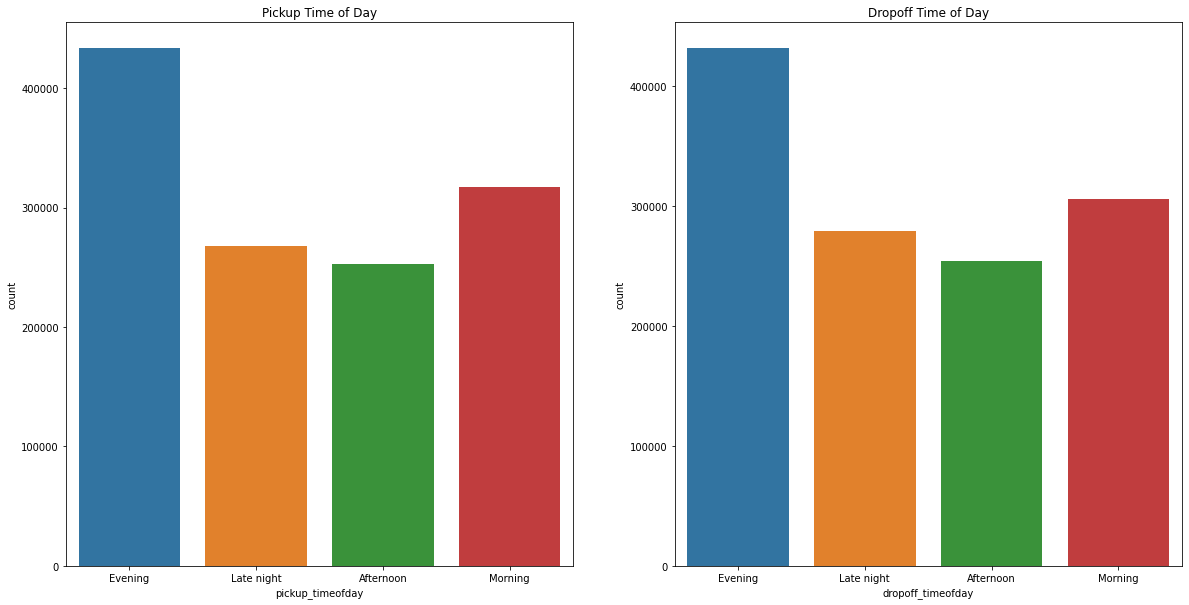

In [148]:
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,10))
ax5.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=train_df,ax=ax5)
ax6.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=train_df,ax=ax6)

In [149]:
bins=np.array([0,1800,3600,5400,7200,90000])
train_df['duration_time']=pd.cut(train_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

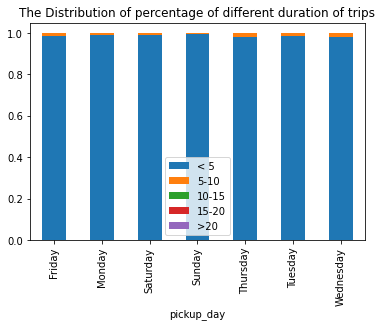

In [150]:
ax1=train_df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

In [151]:
train_df['trip_duration_hour']=train_df['trip_duration']/3600
train_df['log_distance']=np.log(train_df.distance)
train_df['log_trip_duration']=np.log(train_df.trip_duration_hour)

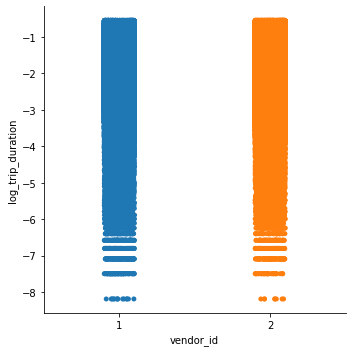

In [152]:
sns.catplot(x="vendor_id", y="log_trip_duration",kind="strip",data=train_df)

#One Hot Encoding

In [153]:
#One Hot Encoding

train_df.store_and_fwd_flag = train_df.store_and_fwd_flag.map(lambda x: 1 if x == 'Y' else 0)


In [154]:
train_df['store_and_fwd_flag'].value_counts(normalize=True)

0    0.995234
1    0.004766
Name: store_and_fwd_flag, dtype: float64

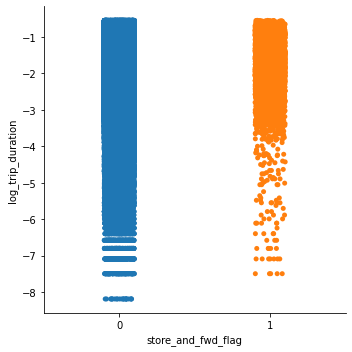

In [155]:
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=train_df)

#Trip Duration per hour

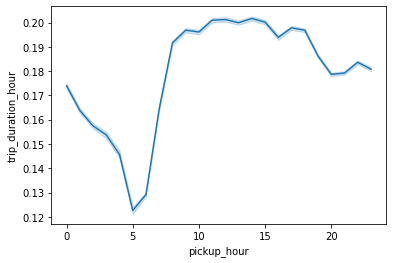

In [156]:
sns.lineplot(x='pickup_hour',y='trip_duration_hour',data=train_df)

#Trip Duration per time of day

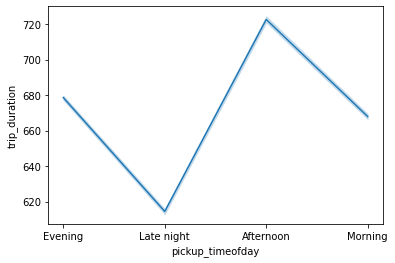

In [157]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=train_df)

#Trip Duration per Day of Week

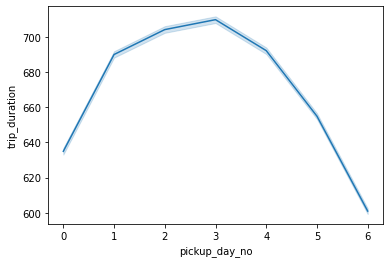

In [158]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=train_df)

#Trip Duration per month

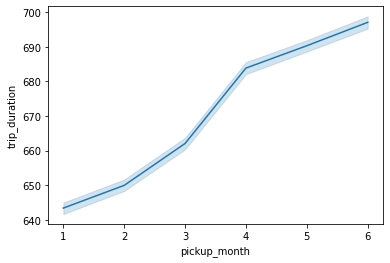

In [159]:
sns.lineplot(x='pickup_month',y='trip_duration',data=train_df)

#Distance per hour of day

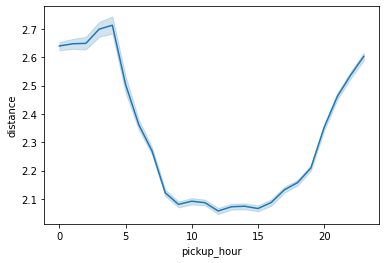

In [160]:
sns.lineplot(x='pickup_hour',y='distance',data=train_df)

#Distance per time of day

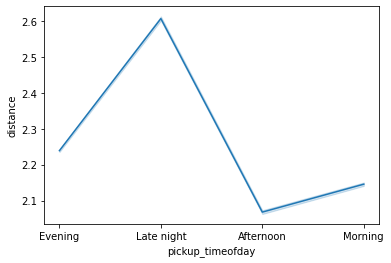

In [161]:
sns.lineplot(x='pickup_timeofday',y='distance',data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


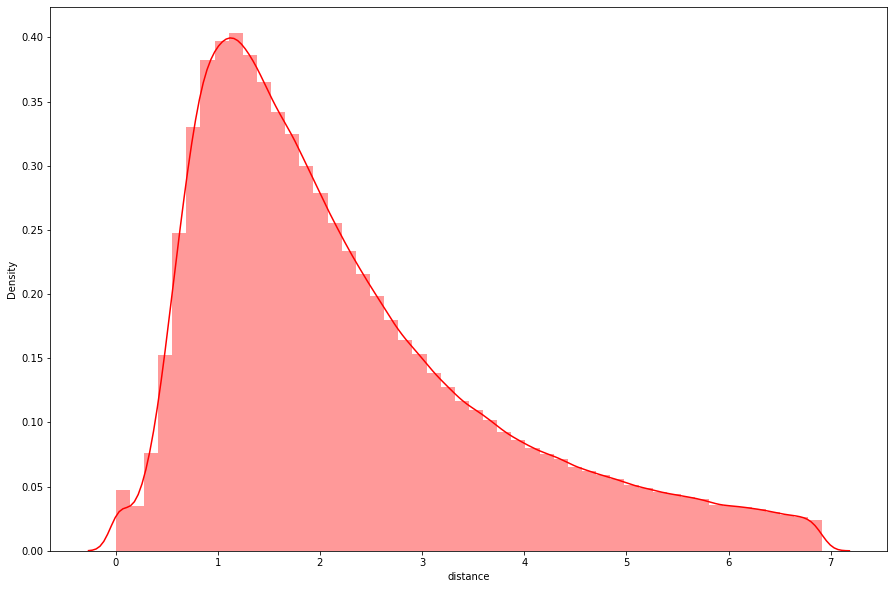

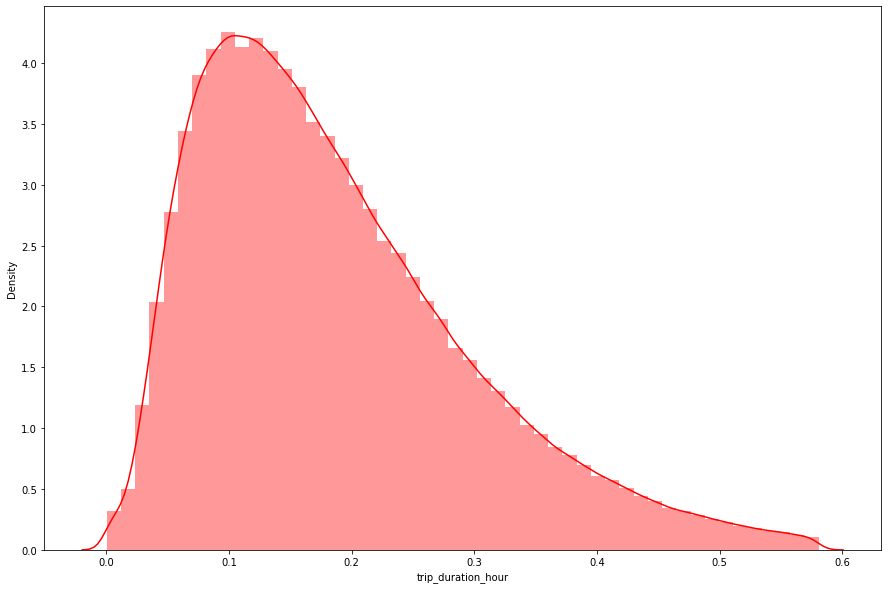

In [162]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(train_df[i],color="R")

In [163]:
train_df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'distance',
       'trip_duration_hour', 'log_distance', 'log_trip_duration'],
      dtype='object')

In [164]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,duration_time,trip_duration_hour,log_distance,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,17,3,3,Evening,Evening,1.498523,< 5,0.126389,0.404480,-2.068392
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,6,6,Late night,Late night,1.805510,< 5,0.184167,0.590843,-1.691914
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,19,4,4,Evening,Evening,1.485501,< 5,0.119167,0.395752,-2.127232
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,13,3,3,Afternoon,Afternoon,1.188590,< 5,0.120833,0.172768,-2.113343
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,...,22,1,1,Late night,Late night,1.098944,< 5,0.123056,0.094350,-2.095119


In [165]:
features=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'distance','log_distance']

In [166]:
features

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_day_no',
 'dropoff_day_no',
 'pickup_hour',
 'dropoff_hour',
 'pickup_month',
 'dropoff_month',
 'distance',
 'log_distance']

In [167]:
newdata=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'distance','log_distance']

trip_df=train_df[newdata]

In [168]:
dataset_pr = trip_df.copy()

In [169]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [170]:
y = train_df['trip_duration_hour']

In [171]:
X[:5]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,log_distance
0,0.937062,-0.502715,-0.110793,0.635912,0.595285,0.483128,-0.069202,-1.565432,-1.565640,0.525806,0.519078,-0.299395,-0.299496,-0.516689,-0.230285
1,-1.067165,-0.502715,-0.029165,-0.615302,-0.946816,-0.857026,-0.069202,1.510087,1.506407,-2.160599,-2.139534,1.486254,1.486009,-0.308224,0.010347
3,0.937062,-0.502715,-1.419333,-1.407304,-1.512613,-1.807494,-0.069202,-0.540259,-0.541624,0.841854,0.831856,0.295821,0.295672,-0.525532,-0.241555
4,0.937062,-0.502715,0.316318,1.712443,0.228327,1.141259,-0.069202,0.997500,0.994399,-0.106289,-0.106477,-0.299395,-0.299496,-0.727155,-0.529472
5,0.937062,3.309202,-0.143730,-0.460606,-0.619356,-0.155563,-0.069202,0.997500,0.994399,1.315925,1.301023,-1.489828,-1.489833,-0.788030,-0.630726


In [172]:
# Importing train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size = 0.2,random_state = 42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(1016670, 15) (1016670,)
(254168, 15) (254168,)


In [173]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.4918684760543993

In [174]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [175]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Ltr_MSE  = mean_squared_error((y_train), (y_pred_train))
print("MSE :" , Ltr_MSE)

Ltr_RMSE = np.sqrt(Ltr_MSE)

print("RMSE :" ,Ltr_RMSE)

Ltr_r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,Ltr_r2)
Ltr_ar2 = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 : ",Ltr_ar2)

MSE : 0.006199840920671342
RMSE : 0.07873906857889126
R2 : 0.4918684760543993
Adjusted R2 :  0.4918609789385082


In [176]:
Lte_MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , Lte_MSE)

Lte_RMSE = np.sqrt(Lte_MSE)
print("RMSE :" ,Lte_RMSE)

Lte_r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,Lte_r2)
Lte_ar2 = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Lte_ar2)

MSE : 0.006189820436435968
RMSE : 0.07867541189238203
R2 : 0.49231066550807
Adjusted R2 :  0.49228070178550487


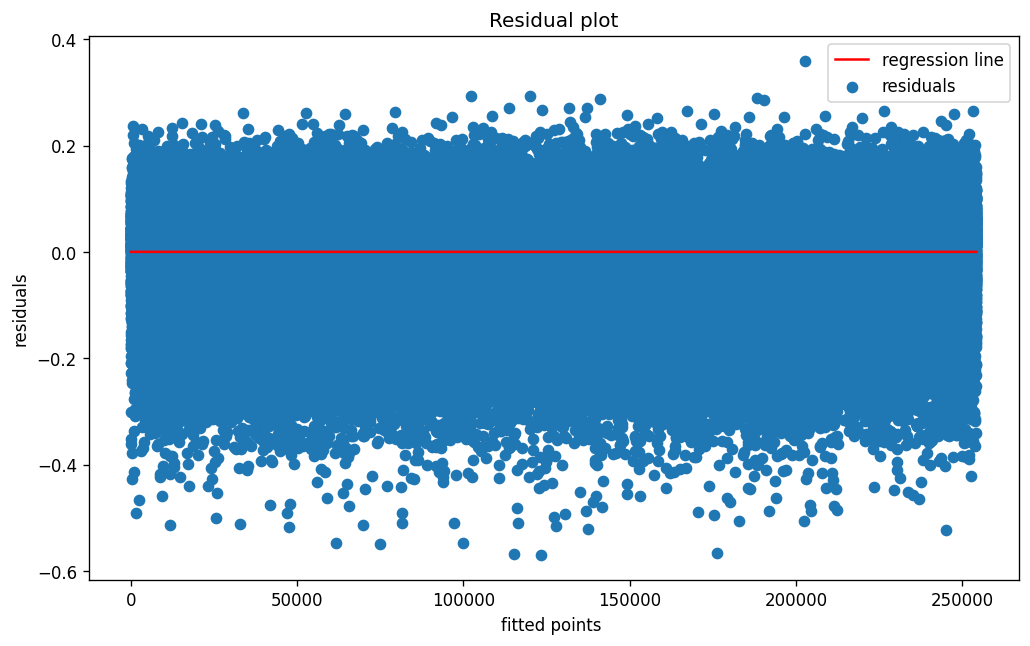

In [177]:
#Heteroskedasticity
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

In [178]:
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [179]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [180]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   4.0s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   4.0s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   4.0s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   4.0s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [181]:
dt_grid.best_score_

0.6187590555560524

In [182]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=20)

In [183]:
dt_optimal_model =dt_grid.best_estimator_

In [184]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [185]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

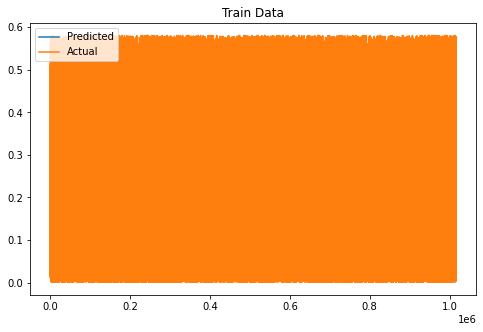

In [186]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_dt_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [187]:
MSE  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.004583084545277018
Train RMSE : 0.06769848259213067
Train R2 : 0.6243758889686206
Train Adjusted R2 :  0.6243703469044912


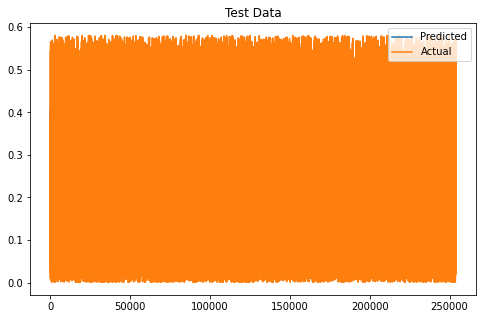

In [188]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_dt_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [189]:
MSE  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.004628479192147505
Test RMSE : 0.06803292726428509
Test R2 : 0.6203719405269017
Test Adjusted R2 :  0.6203495349550703


In [190]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'distance', 'log_distance'],
      dtype='object')

In [191]:
dt_optimal_model.feature_importances_

array([3.15273915e-06, 7.32878407e-05, 5.56309891e-03, 2.75568677e-03,
       6.49854929e-03, 5.07893597e-02, 0.00000000e+00, 1.13718799e-02,
       3.28464245e-02, 6.16871738e-02, 4.42106213e-02, 1.13079965e-03,
       1.32314716e-03, 3.09528937e-02, 7.50793925e-01])

In [192]:
importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [193]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df

,Feature,Feature Importance
0,vendor_id,0.00
1,passenger_count,0.00
2,pickup_longitude,0.01
3,pickup_latitude,0.00
4,dropoff_longitude,0.01
5,dropoff_latitude,0.05
6,store_and_fwd_flag,0.00
7,pickup_day_no,0.01
8,dropoff_day_no,0.03
9,pickup_hour,0.06


In [194]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
14,log_distance,0.75
9,pickup_hour,0.06
5,dropoff_latitude,0.05
10,dropoff_hour,0.04
8,dropoff_day_no,0.03
13,distance,0.03
2,pickup_longitude,0.01
4,dropoff_longitude,0.01
7,pickup_day_no,0.01
0,vendor_id,0.00


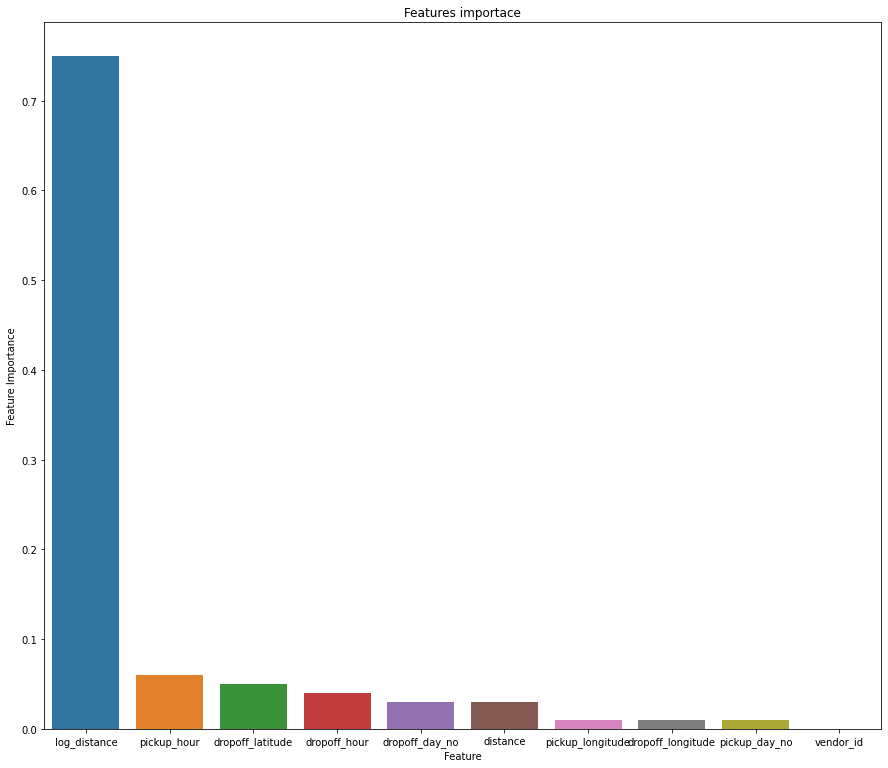

In [195]:
plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

#Model_XGBoost

In [196]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [197]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [198]:
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[14:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  52.8s
[14:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  52.2s
[14:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=  52.4s
[14:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time= 1.7min
[14:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [199]:
xgb_grid.best_score_

0.7285727609513498

In [200]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [201]:
xgb_optimal_model =xgb_grid.best_estimator_

In [202]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

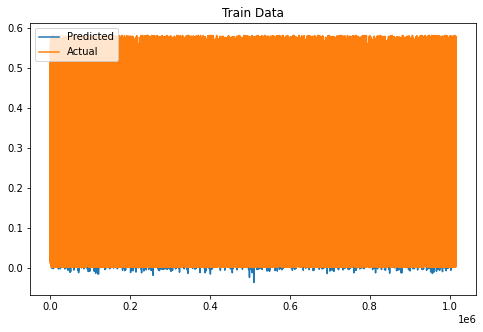

In [203]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_xgb_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [204]:
MSE  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.003030188422020945
Train RMSE : 0.05504714726505766
Train R2 : 0.7516493922303591
Train Adjusted R2 :  0.7516457279954114


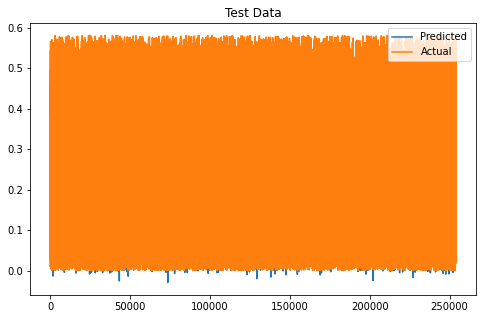

In [205]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_xgb_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [206]:
MSE  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.0032717891891673677
Test RMSE : 0.0571995558476407
Test R2 : 0.7316477120614684
Test Adjusted R2 :  0.7316318739633261


In [207]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.006199840920671342','0.07873906857889126','0.4918684760543993','0.4918609789385082'])
train.add_row(['2','DecisionTree Regressor','0.004583084545277018','0.06769848259213067','0.6243758889686206','0.6243703469044912'])
train.add_row(['3','XGBRegressor','0.003030188422020945','0.05504714726505766','0.7516493922303591','0.7516457279954114'])
print(train)

+-------+------------------------+----------------------+---------------------+--------------------+--------------------+
| SL NO |       MODEL_NAME       |      Train MSE       |      Train RMSE     |     Train R^2      | Train Adjusted R^2 |
+-------+------------------------+----------------------+---------------------+--------------------+--------------------+
|   1   |   Linear Regression    | 0.006199840920671342 | 0.07873906857889126 | 0.4918684760543993 | 0.4918609789385082 |
|   2   | DecisionTree Regressor | 0.004583084545277018 | 0.06769848259213067 | 0.6243758889686206 | 0.6243703469044912 |
|   3   |      XGBRegressor      | 0.003030188422020945 | 0.05504714726505766 | 0.7516493922303591 | 0.7516457279954114 |
+-------+------------------------+----------------------+---------------------+--------------------+--------------------+


In [209]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.006189820436435968',' 0.07867541189238203','0.49231066550807','0.49228070178550487'])
test.add_row(['2','DecisionTree Regressor','0.004628479192147505','0.06803292726428509','0.6203719405269017','0.6203495349550703'])
test.add_row(['3','XGBRegressor','0.0032717891891673677','0.0571995558476407','0.7316477120614684','0.7316318739633261'])
print(test)

+-------+------------------------+-----------------------+----------------------+--------------------+---------------------+
| SL NO |       MODEL_NAME       |        Test MSE       |      Test RMSE       |      Test R^2      |  Test Adjusted R^2  |
+-------+------------------------+-----------------------+----------------------+--------------------+---------------------+
|   1   |   Linear Regression    |  0.006189820436435968 |  0.07867541189238203 |  0.49231066550807  | 0.49228070178550487 |
|   2   | DecisionTree Regressor |  0.004628479192147505 | 0.06803292726428509  | 0.6203719405269017 |  0.6203495349550703 |
|   3   |      XGBRegressor      | 0.0032717891891673677 |  0.0571995558476407  | 0.7316477120614684 |  0.7316318739633261 |
+-------+------------------------+-----------------------+----------------------+--------------------+---------------------+
